# Bim File

variant identifier and minor allele

In [1]:
import pandas as pd
df_bim=pd.read_csv('Data/DataS1.bim', sep='\t', header=None)
# df_bim = 1 and 4 columns
df_bim = df_bim[[1, 4]]

df_bim.rename(columns={1: 'VariantID', 4: 'minor'}, inplace=True)

In [2]:
# conver df_bim['variantID'] to a list
columns= df_bim['VariantID'].to_list()
columns.insert(0, 'familyID')
columns.insert(1, 'individualID')
columns.insert(2, 'fatherID')
columns.insert(3, 'motherID')
columns.insert(4,'Sex')
columns.insert(5, 'date')

In [3]:
minor=df_bim['minor'].to_list()
minor.insert(0, 'None')
minor.insert(1, 'None')
minor.insert(2, 'None')
minor.insert(3, 'None')
minor.insert(4,'None')
minor.insert(5, 'None')

# Ped File

familly id and individual id and allels

## Split the ped file by familly id

In [4]:
! rm -r Data/out/*

In [5]:
import os
 
def split_and_convert(file_path):
    # Create a directory to store output files
    os.makedirs('Data/out', exist_ok=True)
    populations = []
    with open(file_path, 'r') as ped_file:
        for row in ped_file:
            row_data = row.strip().split()
            populations.append(row_data[0])
            pedigree = row_data[0]
            with open(f'Data/out/{pedigree}.txt', 'a') as out_file:
                # Join the pairs of alleles in each row
                new_fields = row_data[:6]
                for i in range(6, len(row_data), 2):
                    new_fields.append(row_data[i] + row_data[i+1])
                # Write the new fields to the output file
                out_file.write(' '.join(new_fields) + '\n')
        
    return list(set(populations))

file_path = 'Data/DataS1.ped'

populations = split_and_convert(file_path)
print(populations)



['CzechRepublic', 'Macedonia', 'Switzerland', 'Portugal', 'TheNetherlands', 'Kazakhstan', 'Spain', 'Poland', 'Latvia', 'Germany', 'Serbia', 'Romania', 'Greece', 'Iran', 'Russia', 'Lithuania', 'Croatia', 'Austria', 'France', 'Italy', 'Bulgaria', 'Israel', 'Jordan', 'Sweden', 'Estonia', 'Norway', 'Armenia', 'Georgia', 'UnitedKingdom', 'Turkey', 'Denmark', 'Ukraine', 'Luxembourg', 'Hungary']


In [6]:
dfeuro = pd.read_excel(
    'Data/Eurasian - Dataset_tims.xlsx', sheet_name='Eurasian')
dfeuro = pd.DataFrame(dfeuro)
dfeuro.rename(columns={
              'Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]': 'date'}, inplace=True)

# date_range is a list of the range of dates from 0 to 12000 years ago in 1000 year intervals
date_range = list(range(0, 12000, 1000)) 
# if dfeuro['date'] is in the range of date_range, then dfeuro['cat_date'] is the index of the range
dfeuro['cat_date']=pd.cut(dfeuro['date'], date_range, labels=range(0, len(date_range)-1))


In [40]:

def freq(pop_path, country):
    '''This function takes a population file and returns a dictionary of the frequency of each variant'''
    df = pd.read_csv(pop_path, sep=' ', header=None)
    df.columns = columns
    df.date = 0
    # print(len(df))
    # locate df['individualID'] in dfeuro['Master ID'] and add df['cat_date'] to the df[date]
    for i in range(0, len(df)):
        for j in range(0, len(dfeuro)):
            if df['individualID'][i] == dfeuro['Master ID'][j]:
                df['date'][i] = dfeuro['cat_date'][j]
  
    # get unique dates in df['date'] and store in a list and remove None
    date = df['date'].unique()
    date = date.tolist()
    if 0 in date:
        date.remove(0)
    

    countryfreq = {}
    
    for d in date:
        freqdate= []
        df2 = df[df['date'] == d]
        for i in range(6, len(df.columns)):
            minorAllele = minor[i]
            count = 0
            total = len(df2)*2
            for j in range(0, len(df2)):
                # count occurrences of the minor allele in column i
                count += str(df2.iloc[j, i]).count(str(minorAllele))
            freqdate.append(count/total)
            
        name= f'{country}_{d}'
        countryfreq[name] = freqdate
        
    return countryfreq


In [42]:
! rm Data/DataS1_freq.txt
counter = 0
with open('Data/DataS1_freq.txt', 'a') as f:
    for country in populations:
        print(country)
        pop_path=f'Data/out/{country}.txt'
        freq_results = freq(pop_path, country)
        for key, value in freq_results.items():
            str_values = [str(val) for val in value]  # convert float values to strings
            f.write('%s\t%s\n' % (key, '\t'.join(str_values)))
        counter += 1
        print(counter, 'of', len(populations), 'done')
    

rm: cannot remove 'Data/DataS1_freq.txt': No such file or directory
CzechRepublic 

/tmp/ipykernel_135021/1823948172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = dfeuro['cat_date'][j]


Macedonia Switzerland Portugal TheNetherlands Kazakhstan Spain Poland Latvia Germany Serbia Romania Greece Iran Russia Lithuania Croatia Austria France Italy Bulgaria Israel Jordan Sweden Estonia Norway Armenia Georgia UnitedKingdom Turkey Denmark Ukraine Luxembourg Hungary 

In [3]:
! pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.3 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyplink 1.3.5 requires pandas>=0.17.1, which is not installed.
pandas-plink 2.2.9 requires pandas>=1.1.3, which is not installed.
pandas-plink 2.2.9 requires pytest>=5.2.2, which is not installed.
pandas-plink 2.2.9 requires xarray>=0.18.2, which is not installed.


In [2]:
! pip install sklearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load SNP data into a NumPy array
data = pd.read_csv('Data/DataS1_freq.txt', sep='\t', header=None)


Cluster labels: {'CzechRepublic_4': 4, 'CzechRepublic_6': 4, 'CzechRepublic_5': 4, 'CzechRepublic_3': 1, 'Macedonia_7': 0, 'Portugal_4': 3, 'TheNetherlands_3': 4, 'TheNetherlands_4': 4, 'Kazakhstan_2': 4, 'Kazakhstan_3': 3, 'Spain_4': 3, 'Spain_3': 3, 'Spain_7': 4, 'Spain_5': 4, 'Spain_6': 3, 'Spain_9': 3, 'Poland_5': 4, 'Poland_4': 4, 'Poland_3': 3, 'Latvia_7': 1, 'Latvia_5': 1, 'Latvia_6': 1, 'Latvia_8': 1, 'Latvia_4': 2, 'Latvia_2': 4, 'Germany_9': 3, 'Germany_4': 3, 'Germany_7': 4, 'Germany_6': 4, 'Germany_3': 4, 'Germany_5': 3, 'Serbia_7': 4, 'Serbia_6': 4, 'Serbia_8': 3, 'Romania_6': 4, 'Romania_5': 4, 'Romania_7': 4, 'Romania_9': 3, 'Romania_8': 3, 'Greece_7': 4, 'Greece_5': 4, 'Greece_6': 4, 'Greece_8': 4, 'Greece_3': 4, 'Iran_9': 3, 'Iran_2': 4, 'Iran_6': 4, 'Iran_5': 4, 'Iran_7': 4, 'Russia_7': 3, 'Russia_2': 3, 'Russia_3': 3, 'Russia_4': 3, 'Russia_5': 3, 'Lithuania_6': 1, 'Lithuania_7': 3, 'Lithuania_4': 3, 'Lithuania_3': 1, 'Lithuania_8': 4, 'Lithuania_2': 3, 'Croatia_4': 

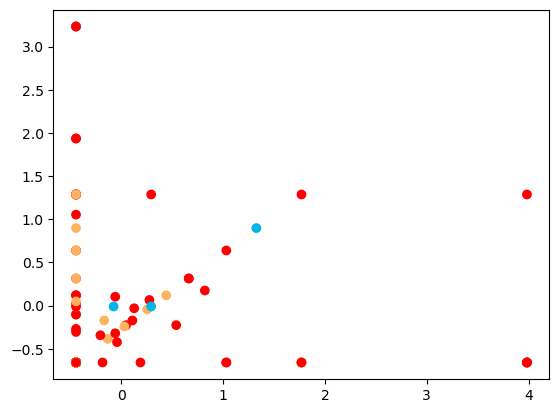

In [3]:

# Scale the data
scaler = StandardScaler()

# from column 1 to the end
data2= scaler.fit_transform(data.iloc[:, 1:])

# Choose the number of clusters
k = 5
# Initialize K centroids randomly
kmeans = KMeans(n_clusters=k, init='random', n_init=10)

# Fit the K-means model to the data
kmeans.fit(data2)

# Get the cluster assignments for each SNP
labels = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Get the sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_

# from first column of data get the country names and store in a list
country = data.iloc[:, 0].to_list()

# create a dictionary with country as key and labels as value
country_labels = dict(zip(country, labels))


# Print the results
print('Cluster labels: %s' % country_labels )
# print('Cluster centroids: %s' % centroids)
# print('Sum of squared distances: %s' % inertia)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='rainbow')
plt.show()




In [4]:
dataframe = pd.DataFrame(columns=['country', 'date', 'label'])

for key, value in country_labels.items():
    a= key.split('_')
    b= a[0]
    c= a[1]
    d= value
    e= f'{b}\t{c}\t{d}'
    ## add to a dataframe
    dataframe = dataframe.append({'country': b, 'date': c, 'label': d}, ignore_index=True)

dataframe
    
    

,country,date,label
0,CzechRepublic,4,4
1,CzechRepublic,6,4
2,CzechRepublic,5,4
3,CzechRepublic,3,1
4,Macedonia,7,0
...,...,...,...
114,Hungary,4,4
115,Hungary,6,4
116,Hungary,5,4
117,Hungary,7,4


Traceback (most recent call last):
  File "/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1030, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
  File "/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/IPython/core/ultratb.py", line 935, in format_exception_as_a_whole
    self.get_records(etb, number_of_

Unexpected exception formatting exception. Falling back to standard exception


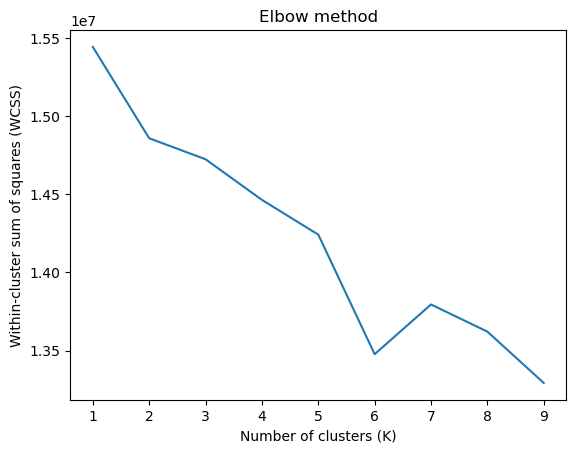

In [5]:
# Calculate the within-cluster sum of squares for different values of K
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs K
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method')
plt.show()

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def gap_statistic(data, max_k):
    """
    Computes the Gap statistic for K-means clustering.

    Args:
        data: numpy array of shape (n_samples, n_features)
            The input data.
        max_k: int
            The maximum number of clusters to consider.

    Returns:
        gaps: numpy array of shape (max_k,)
            The Gap statistic for each value of K.
    """
    n_samples, n_features = data.shape

    # Compute the reference distribution
    B = 10  # number of Monte Carlo samples
    ref_disp = np.zeros(max_k)
    for k in range(1, max_k + 1):
        ref_samples = np.random.uniform(low=data.min(axis=0), high=data.max(axis=0), size=(n_samples, n_features))
        ref_kmeans = KMeans(n_clusters=k).fit(ref_samples)
        ref_disp[k - 1] = np.log(ref_kmeans.inertia_)

    # Compute the observed dispersion for each value of K
    obs_disp = np.zeros(max_k)
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k).fit(data)
        obs_disp[k - 1] = np.log(kmeans.inertia_)

    # Compute the gap statistic
    gaps = np.zeros(max_k)
    for k in range(1, max_k + 1):
        gaps[k - 1] = np.mean(ref_disp[k - 1]) - obs_disp[k - 1]

    # Compute the standard error of the gap statistic
    se = np.sqrt(1 + 1 / B) * np.std(ref_disp, axis=0)

    # Compute the optimal value of K
    k_opt = np.argmax(gaps) + 1

    # Plot the results
    fig, ax = plt.subplots()
    ax.plot(range(1, max_k + 1), gaps, '-o')
    ax.fill_between(range(1, max_k + 1), gaps - se, gaps + se, alpha=0.3)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Gap statistic')
    ax.set_title('Gap statistic for K-means clustering')
    ax.axvline(x=k_opt, linestyle='--', color='red', label='Optimal number of clusters')
    ax.legend()

    return gaps


/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

array([1.19025148, 1.21271428, 1.2336829 , 1.24918897, 1.25605618,
       1.28035873, 1.29324656, 1.28508895, 1.31633816, 1.33557693,
       1.34384744, 1.3419357 , 1.35502012, 1.35859678, 1.3822402 ,
       1.39596155, 1.38853043, 1.42228931, 1.44858363, 1.42385664,
       1.4589078 , 1.46874651, 1.48606355, 1.49498403, 1.50615294,
       1.51092855, 1.5383374 , 1.55445268, 1.53562594, 1.53793725,
       1.57040984, 1.58413906, 1.58847103])

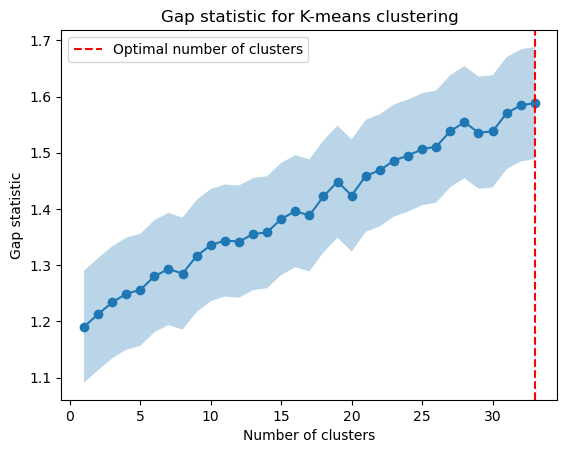

In [34]:

gap_statistic(data2, max_k=33)


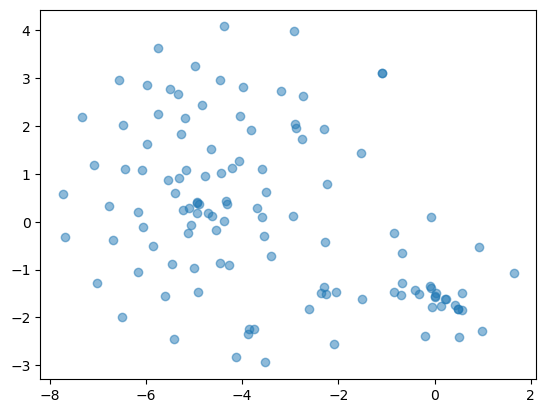

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Read in your dataset as a pandas dataframe


# Perform PCA to reduce the number of features
pca = PCA(n_components=50)
df_pca = pca.fit_transform(data2)

# Apply t-SNE to the transformed dataset
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_pca)

# Visualize the t-SNE results
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5)
plt.show()


/home/inf-48-2022/miniconda3/envs/pli/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


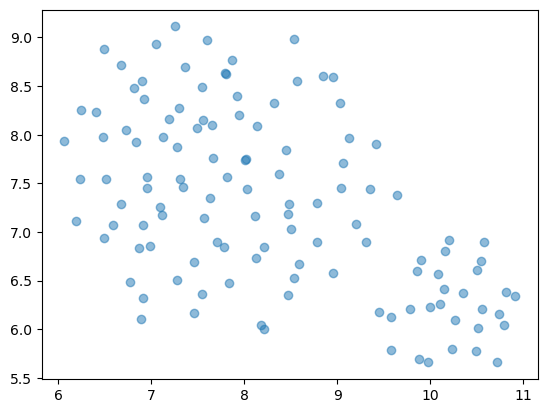

In [8]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Read in your dataset as a pandas dataframe


# Apply UMAP to the dataset
reducer = umap.UMAP()
df_umap = reducer.fit_transform(data2)

# Visualize the UMAP results
plt.scatter(df_umap[:, 0], df_umap[:, 1], alpha=0.5)
plt.show()
